In [16]:
import codecs

# For status inquiry : WIN 205
STX=0x02
ADDR=0x80
WIN1=0x32
WIN2=0x30
WIN3=0x35
COM=0x30
ETX=0x03

# # Pressure reading : WIN 812
# STX=0x02
# ADDR=0x80
# WIN1=0x32
# WIN2=0x30
# WIN3=0x35
# COM=0x30
# ETX=0x03

# # Pressure reading : WIN 812
STX=0x02
ADDR=0x80
WIN1=0x38
WIN2=0x31
WIN3=0x32
COM=0x30
ETX=0x03

CRCraw=hex(ADDR ^ WIN1 ^ WIN2 ^ WIN3 ^ COM ^ ETX)
CRC1=codecs.encode(bytes(CRCraw[2].upper(),'utf-8'),"hex")
CRC2=codecs.encode(bytes(CRCraw[3].upper(),'utf-8'),"hex")
print(CRCraw)

command=[STX, ADDR, WIN1, WIN2, WIN3, COM, ETX, int(CRC1,16), int(CRC2,16)]

a=''
asci=''
for c in command:
    a=a+str(hex(c))+' '
    asci=asci+chr(c)
print(a)
print(bytes(asci,'utf-8'))
tobesent=bytes(asci,'utf-8')

0x88
0x2 0x80 0x38 0x31 0x32 0x30 0x3 0x38 0x38 
b'\x02\xc2\x808120\x0388'


In [49]:
# Minimal working example
import serial

sendthis=b'\x02\x808120\x0388' # To read the pressure

ser = serial.serial_for_url('socket://192.168.0.49:23')
ser.write(sendthis)
response =  ser.read(17) # Pressure response is expected to be 17 byte long
pressure=float(response[6:14])
ser.close()


ser2 = serial.serial_for_url('socket://192.168.0.50:23')
ser2.write(sendthis)
response =  ser2.read(17) # Pressure response is expected to be 17 byte long
pressure2=float(response[6:14])
ser2.close()

print(pressure)
print(pressure2)

1.6e-08
9.05e-08


2020-08-08 23:01:18.393843
1.57e-08
1.19e-07


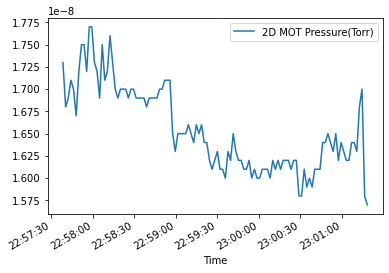

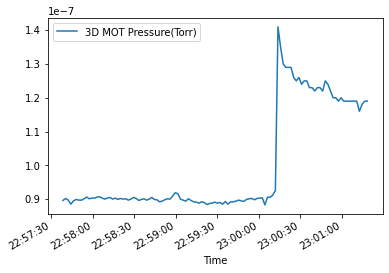

In [ ]:
# For data collection
import serial
import pandas as pd
import time
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

#initialization
d={'Time':[], '2D MOT Pressure(Torr)' : [], '3D MOT Pressure(Torr)':[]}
df=pd.DataFrame(data=d)

for i in range(100000):
    clear_output(wait=True)
    sendthis=b'\x02\x808120\x0388' # To read the pressure

    ser = serial.serial_for_url('socket://192.168.0.49:23')
    ser.write(sendthis)
    response =  ser.read(17) # Pressure response is expected to be 17 byte long
    ser.close()
    pressure=float(response[6:14])

    ser2 = serial.serial_for_url('socket://192.168.0.50:23')
    ser2.write(sendthis)
    response =  ser2.read(17) # Pressure response is expected to be 17 byte long
    ser2.close()
    pressure2=float(response[6:14])
        
    currentdata={'Time':[pd.Timestamp.now()], '2D MOT Pressure(Torr)' : [pressure], '3D MOT Pressure(Torr)':[pressure2]}
    currentdf=pd.DataFrame(data=currentdata)
    df=df.append(currentdf,ignore_index=True)
    print(pd.Timestamp.now())
    print(pressure)
    print(pressure2)
    if np.mod(i,1)==0:
        df.plot(kind='line',x='Time',y='2D MOT Pressure(Torr)')
        df.plot(kind='line',x='Time',y='3D MOT Pressure(Torr)')
        plt.pause(0.01)
    if np.mod(i,1800)==0:
        df.to_csv('backup_{}.csv'.format(i))
        
    
    time.sleep(1)
    